In [138]:
import pandas as pd
from tqdm import tqdm
import math
import matplotlib.pyplot as plt

In [90]:
data = open(f"../Q3/IR-assignment-2-data.txt", 'r')

In [34]:
x = data.readlines()

In [68]:
pairs = []

for i, url in tqdm(enumerate(x)):
    spaces = []
    for i in range(len(url)):
        if url[i] == ' ':
            spaces.append(i)
    relevance = int(url[0 : spaces[0]])
    qid = int(url[spaces[0] + 5 : spaces[1]])
    if qid == 4:
        pairs.append((relevance, i, url))


239093it [02:13, 1787.85it/s]


In [117]:
print(f"Total query-url pairs with qid = 4 : {len(pairs)}") # Total query-url pairs with qid = 4

Total query-url pairs with qid = 4 : 103


In [111]:
sorted_pairs = max_dcg_files(pairs)

Num of URL's with relevance score : {0: 59, 1: 26, 2: 17, 3: 1, 4: 0}
Number of files possible : 19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


In [113]:
def DCG(pairs):
    # Function to compute DCG value of given sorting of pairs
    dcg_value = pairs[0][0]
    for i in range(1, len(pairs)):
        dcg_value += pairs[i][0] / math.log2(i + 1)
    return dcg_value

def nDCG(pairs, sorted_pairs, p):
    dcg_p = DCG(pairs[:p])
    idcg_p = DCG(sorted_pairs[:p])
    ndcg_p = dcg_p / idcg_p
    return ndcg_p

In [116]:
print(f"nDCG at 50 : {nDCG(pairs, sorted_pairs, 50)}")
print(f"nDCG for entire dataset : {nDCG(pairs, sorted_pairs, len(sorted_pairs))}")

nDCG at 50 : 0.3521042740324887
nDCG for entire dataset : 0.5979226516897831


In [144]:
qu_pairs_feature75 = []

for pair in pairs:
    feature75_value = float(pair[2].split()[76].split(":")[1])
    qu_pairs_feature75.append((pair[0], pair[1], feature75_value, pair[2]))

In [126]:
ranked_qu_pairs_feature = sorted(qu_pairs_feature75, key = lambda x : x[2], reverse = True)

In [134]:
ranked_qu_pairs_feature[0]

(0,
 1199,
 972.826451,
 '0 qid:4 1:3 2:0 3:3 4:0 5:3 6:1 7:0 8:1 9:0 10:1 11:937 12:0 13:8 14:10 15:955 16:14.976692 17:28.949002 18:25.594644 19:28.531344 20:14.972391 21:194 22:0 23:3 24:0 25:197 26:63 27:0 28:1 29:0 30:64 31:66 32:0 33:1 34:0 35:67 36:64.666667 37:0 38:1 39:0 40:65.666667 41:1.555556 42:0 43:0 44:0 45:1.555556 46:0.207044 47:0 48:0.37500 49:0 50:0.206283 51:0.067236 52:0 53:0.12500 54:0 55:0.067016 56:0.070438 57:0 58:0.12500 59:0 60:0.070157 61:0.069015 62:0 63:0.12500 64:0 65:0.068761 66:0.000002 67:0 68:0 69:0 70:0.000002 71:958.127913 72:0 73:25.594644 74:0 75:972.826451 76:77.925852 77:0 78:4.687525 79:0 80:79.05829 81:520.938595 82:0 83:11.917884 84:0 85:529.002984 86:319.375971 87:0 88:8.531548 89:0 90:324.275484 91:33505.554515 92:0 93:8.817753 94:0 95:34561.412223 96:1 97:0 98:1 99:0 100:1 101:0.999883 102:0 103:1 104:0 105:0.999886 106:50.257657 107:0 108:24.568095 109:0 110:50.282174 111:-8.051425 112:-29.251906 113:-9.821387 114:-31.107208 115:-8.061919

In [141]:
precision_k = []
recall_k = []
total_relevant = 0
relevant_k = 0

for pair in ranked_qu_pairs_feature:
    if pair[0] != 0:
        total_relevant += 1

for i in range(len(ranked_qu_pairs_feature)):
    if ranked_qu_pairs_feature[i][0] != 0:
        relevant_k += 1
    p_k = relevant_k / (i + 1)
    r_k = relevant_k / total_relevant
    
    precision_k.append(p_k)
    recall_k.append(r_k)

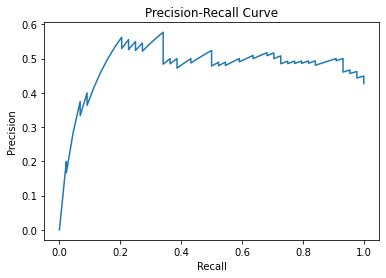

In [143]:
plt.plot(recall_k, precision_k)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall Curve")
plt.savefig('Precision_Recall_Curve.png', bbox_inches='tight', facecolor='white')
plt.show()